<a href="https://colab.research.google.com/github/SriChandrahas/XGBoost-Public/blob/main/XGBOOST_FRAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  
import seaborn as sns 
%matplotlib inline

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bulk.csv')
data.head()

,S.No,"Spacing Burden Ratio (Se/Be), m","Total Explosive, kg",Firing pattern,"Joint angle, degree",Fragmentation,PPV
0,1,1.3,7425.0,1,86,0.67,5.33
1,2,1.2,10125.0,1,83,1.40,5.29
2,3,1.3,8100.0,1,85,0.91,4.94
3,4,1.3,8230.0,2,85,1.20,4.56
4,5,1.3,8100.0,3,80,0.89,5.15


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.rename(columns={'Spacing Burden Ratio (Se/Be), m': 'SBR', 'Total Explosive, kg': 'TE','Firing pattern':'FP','Joint angle, degree':'JAD'},inplace=True)
data.head(1)

,S.No,SBR,TE,FP,JAD,Fragmentation,PPV
0,1,1.3,7425.0,1,86,0.67,5.33


In [ ]:
data=data.drop(['S.No','PPV'],axis=1)
data.head(1)

,SBR,TE,FP,JAD,Fragmentation
0,1.3,7425.0,1,86,0.67


In [ ]:
data.head()

,SBR,TE,FP,JAD,Fragmentation
0,1.3,7425.0,1,86,0.67
1,1.2,10125.0,1,83,1.40
2,1.3,8100.0,1,85,0.91
3,1.3,8230.0,2,85,1.20
4,1.3,8100.0,3,80,0.89


In [ ]:
from sklearn.model_selection import train_test_split
train, test= train_test_split(data,test_size=0.15, random_state=42)

In [ ]:
train['pred1'] = train['Fragmentation'].mean()
train.head()

,SBR,TE,FP,JAD,Fragmentation,pred1
67,1.30,4500.0,3,45,0.92,0.769217
60,1.30,5120.0,1,91,0.44,0.769217
138,1.36,6400.0,3,89,0.51,0.769217
36,1.30,5240.0,1,91,0.39,0.769217
86,1.30,7555.0,1,42,1.10,0.769217


In [ ]:
import seaborn as sns

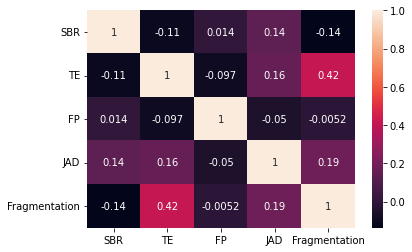

In [ ]:
ax = sns.heatmap(data.corr(),annot=True)

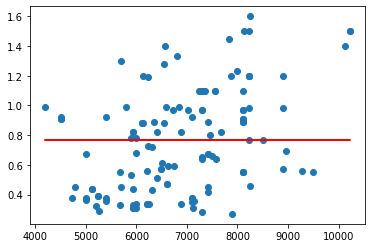

In [ ]:
plt.scatter(train['TE'],train['Fragmentation'])
plt.plot(train['TE'],train['pred1'],color='red')

In [ ]:
train['res1'] = train['Fragmentation'] - train['pred1']


In [ ]:
train.head()

,SBR,TE,FP,JAD,Fragmentation,pred1,res1
67,1.30,4500.0,3,45,0.92,0.769217,0.150783
60,1.30,5120.0,1,91,0.44,0.769217,-0.329217
138,1.36,6400.0,3,89,0.51,0.769217,-0.259217
36,1.30,5240.0,1,91,0.39,0.769217,-0.379217
86,1.30,7555.0,1,42,1.10,0.769217,0.330783


In [ ]:
X=train.drop(['Fragmentation','pred1','res1'],axis=1)
y=train['res1']

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree1 = DecisionTreeRegressor(max_depth=3)
tree1.fit(X.values,y.values)


DecisionTreeRegressor(max_depth=3)

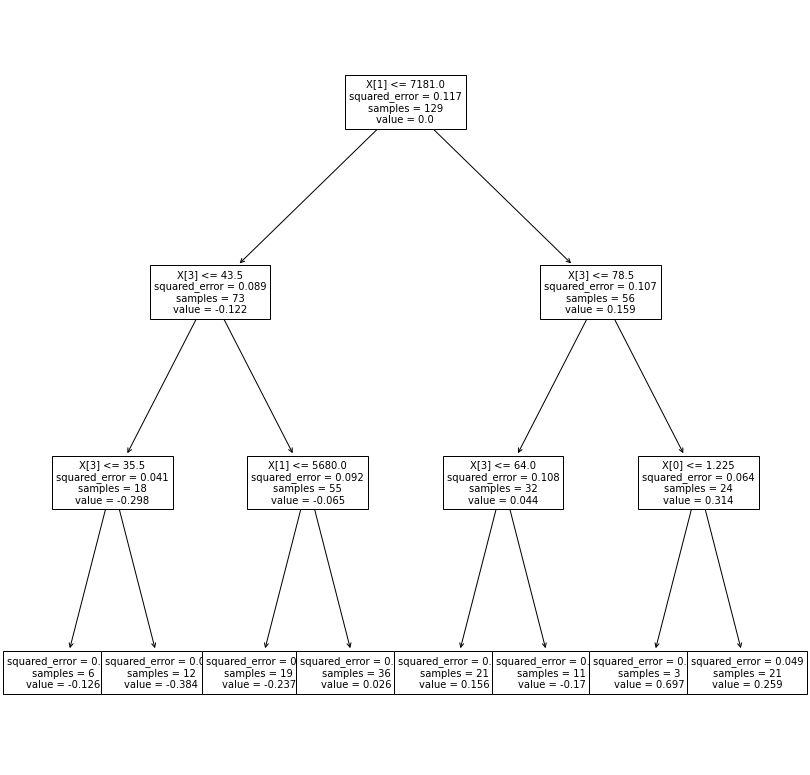

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14,14))  # set plot size (denoted in inches)
plot_tree(tree1,fontsize=10)
plt.show()


In [ ]:
train['pred2'] = 0.769217 + (0.1*tree1.predict(X.values))
train.head()

,SBR,TE,FP,JAD,Fragmentation,pred1,res1,pred2
67,1.30,4500.0,3,45,0.92,0.769217,0.150783,0.745537
60,1.30,5120.0,1,91,0.44,0.769217,-0.329217,0.745537
138,1.36,6400.0,3,89,0.51,0.769217,-0.259217,0.771823
36,1.30,5240.0,1,91,0.39,0.769217,-0.379217,0.745537
86,1.30,7555.0,1,42,1.10,0.769217,0.330783,0.784771


In [ ]:
TE=train.TE.values
pred2=train.pred2.values
ind=[]
for i in range(len(TE)):
  for j in range(i+1,len(TE)):
    if TE[j]<TE[i]:
      t=TE[j]
      TE[j]=TE[i]
      TE[i]=t
      t=pred2[j]
      pred2[j]=pred2[i]
      pred2[i]=t


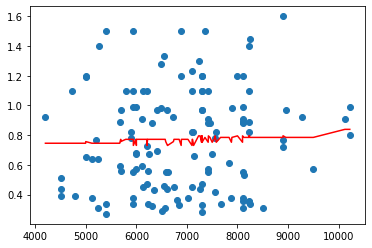

In [ ]:
plt.scatter(train['TE'],train['Fragmentation'])
plt.plot(TE,pred2,color='red')

In [ ]:
train['res2'] = train['Fragmentation'] - train['pred2']
train.head()

,SBR,TE,FP,JAD,Fragmentation,pred1,res1,pred2,res2
67,1.30,4200.0,3,45,0.92,0.769217,0.150783,0.745537,0.174463
60,1.30,4500.0,1,91,0.44,0.769217,-0.329217,0.745537,-0.305537
138,1.36,4500.0,3,89,0.51,0.769217,-0.259217,0.745537,-0.235537
36,1.30,4500.0,1,91,0.39,0.769217,-0.379217,0.745537,-0.355537
86,1.30,4725.0,1,42,1.10,0.769217,0.330783,0.745537,0.354463


In [ ]:
y=train['res2']

In [ ]:
tree2 = DecisionTreeRegressor(max_depth=3)
tree2.fit(X.values,y.values)

DecisionTreeRegressor(max_depth=3)

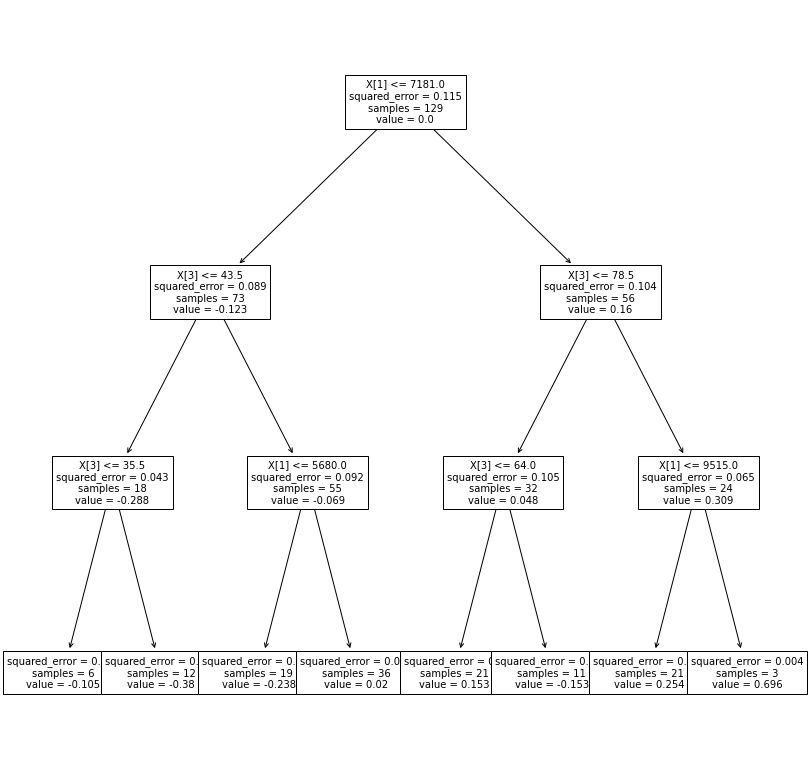

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14,14))  # set plot size (denoted in inches)
plot_tree(tree2,fontsize=10)
plt.show()


In [ ]:
y_pred = 0.769217 + sum(0.1*regressor.predict(X.values) for regressor in [tree1,tree2])

In [ ]:
train['Final']=y_pred
train.head()

,SBR,TE,FP,JAD,Fragmentation,pred1,res1,pred2,res2,Final
67,1.30,4200.0,3,45,0.92,0.769217,0.150783,0.745537,0.174463,0.721786
60,1.30,4500.0,1,91,0.44,0.769217,-0.329217,0.745537,-0.305537,0.721786
138,1.36,4500.0,3,89,0.51,0.769217,-0.259217,0.745537,-0.235537,0.773859
36,1.30,4500.0,1,91,0.39,0.769217,-0.379217,0.745537,-0.355537,0.721786
86,1.30,4725.0,1,42,1.10,0.769217,0.330783,0.745537,0.354463,0.800119


In [ ]:
test.head()

,SBR,TE,FP,JAD,Fragmentation
68,1.30,6210.0,2,85,1.20
147,1.25,7390.0,3,66,0.92
96,1.30,7256.0,1,77,0.73
82,1.30,7688.0,3,72,0.85
135,1.30,8600.0,1,74,1.25


In [ ]:
test

,SBR,TE,FP,JAD,Fragmentation
68,1.30,6210.0,2,85,1.20
147,1.25,7390.0,3,66,0.92
96,1.30,7256.0,1,77,0.73
82,1.30,7688.0,3,72,0.85
135,1.30,8600.0,1,74,1.25
139,1.25,6500.0,3,83,0.88
26,1.40,7020.0,3,68,0.91
12,1.20,6110.0,3,90,0.88
18,1.30,6210.0,3,80,0.56
15,1.30,6210.0,2,85,1.20


In [ ]:
testdata=test.drop('Fragmentation',axis=1)

In [ ]:
pred = 0.769217 + sum(0.1*regressor.predict(testdata.values) for regressor in [tree1,tree2])

In [ ]:
y_data=test['Fragmentation'].values
mape = np.mean(np.abs((y_data - pred)/y_data))*100
mape

31.158381028397635

In [ ]:
print("Mean squared error: %.2f" % mean_squared_error (y_data,pred))

Mean squared error: 0.07


In [ ]:
Fragmentation = 0.769217+0.1*F1 (Tree 1)+0.1*F2 (Tree 2)